# Micrograd_from_scratch_yay
Jupyter notebook with code from the video walkthrough at https://youtu.be/VMj-3S1tku0

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x): 
    return 3*x**2 - 4*x+5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange (-5, 5, 0.25)
print (xs)

ys = f(xs)
print (ys)

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


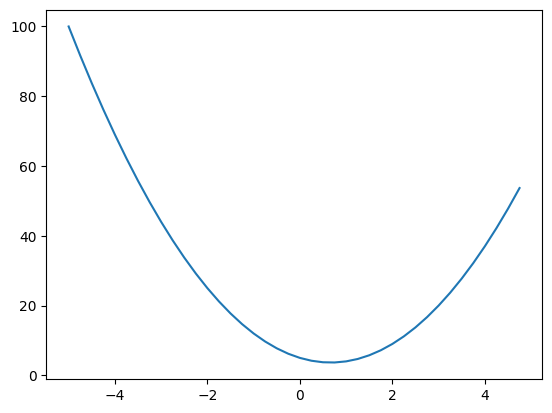

In [5]:
plt.plot(xs, ys)

In [6]:
x=2/3
h=0.0001
print ((f(x+h)-f(x))/h)

0.0002999999981767587


d1= 4.0
d2= 3.999699999999999
Slope1= -3.000000000010772
d1= 4.0
d2= 3.99990001
Slope2= -0.9998999999982772
d1= 4.0
d2= 4.00000001
Slope3= 9.99999993922529e-05


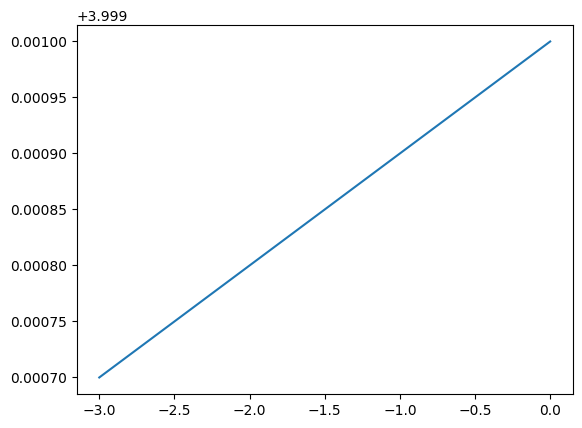

In [7]:
h=0.0001
slopes = [0,1,2]
ds = [0,1,2]

#inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
ds[0] = a*b + c

slopes[0] = (ds[0]-d1)/h

print ("d1=", d1)
print ("d2=", ds[0])
print ("Slope1=", slopes[0])

b += h
ds[1] = a*b + c

slopes[1]  = (ds[1]-d1)/h
print ("d1=", d1)
print ("d2=", ds[1])
print ("Slope2=", slopes[1])

c+= h
ds[2] = a*b + c

slopes[2]  = (ds[2]-d1)/h
print ("d1=", d1)
print ("d2=", ds[2])
print ("Slope3=", slopes[2])

plt.plot(slopes,ds)



In [34]:
import math


class Value:
    """ stores a single scalar value and its gradient """
    
    def __init__(self, data,_children=(), _op="", label=""):
       self.data = data
       self.grad = 0.0
       self._prev = set(_children)
       self._op = _op
       self.label=label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        return Value(t, (self, ), 'tanh')
    


In [2]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root,format='svg', rankdir='LR'):
    
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

Value(data=-8.0)


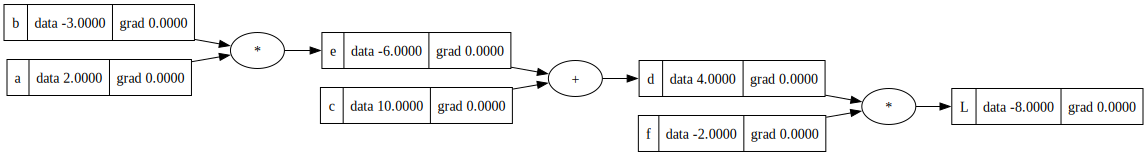

In [36]:
# Let's build our nodes expressions for a simple Loss function (L)
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e = a*b
e.label = 'e'

d = e + c
d.label = 'd'

f = Value (-2.0, label='f')
L = d * f
L.label = 'L'

#print the data
print (L)
#Plot the graph
draw_dot(L)

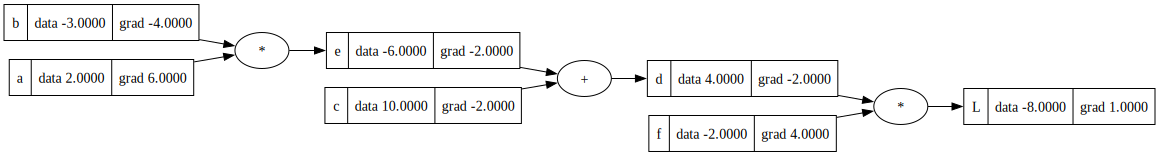

In [37]:
# Manually compute the gradients working backwards from L

L.grad = 1.0
d.grad = -2.0
f.grad = 4.0
e.grad = -2.0
c.grad = -2.0
a.grad = 6.0
b.grad = -4.0

# Redraw the graph with the gradients
draw_dot(L)


Value(data=-7.4352)


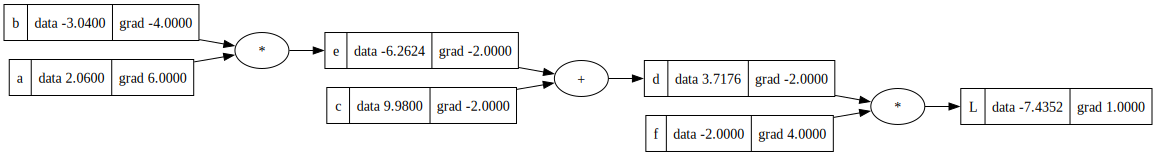

In [38]:
# Manual data changes and forward pass

# Nudge the lead node in the direction of the gradient
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

#rerun the forward pass
e = a * b
e.label = 'e'

d = e + c
d.label = 'd'

f = Value (-2.0, label='f')
L = d * f
L.label = 'L'

# restore the manual assigned gradients
L.grad = 1.0
d.grad = -2.0
f.grad = 4.0
e.grad = -2.0
c.grad = -2.0
a.grad = 6.0
b.grad = -4.0

# Loss (L) reduces aka becomes "less negative" / moves to zero aka improves
# Before: -8.0, After: -7.xx
print (L)
draw_dot(L)

### TANH FUNCTION
The hyperbolic tangent function, often denoted as tanh, is a mathematical function that maps its input to a range between -1 and 1. In the context of machine learning, the tanh function is commonly used as an activation function in neural networks. Here are some reasons why the tanh function is useful in machine learning:

**Squashing Input Range**

The tanh function squashes its input values to the range of [-1, 1]. This can be beneficial for the numerical stability of the model, especially when dealing with neural networks with multiple layers. It helps to keep the activations within a manageable range, preventing issues like vanishing or exploding gradients during training.

**Zero-Centered Output**

Unlike the sigmoid function, which maps inputs to the range [0, 1], the tanh function maps inputs to the range [-1, 1]. This makes the output of the tanh function zero-centered. Zero-centered activations can help in learning more efficiently, as positive and negative values provide a balanced update direction for the weights during back propagation.

**Gradients and Derivatives**

The tanh function has steeper gradients in comparison to the sigmoid function. Steeper gradients can accelerate learning in the network, as weight updates during back propagation are more pronounced. This can lead to faster convergence during training.
Similarity to Sigmoid:

**Capturing Negative and Positive Relationships**

The tanh function captures both negative and positive relationships in the data. This can be advantageous in scenarios where the input data may have both positive and negative values, as the tanh function can model relationships on both sides of zero.


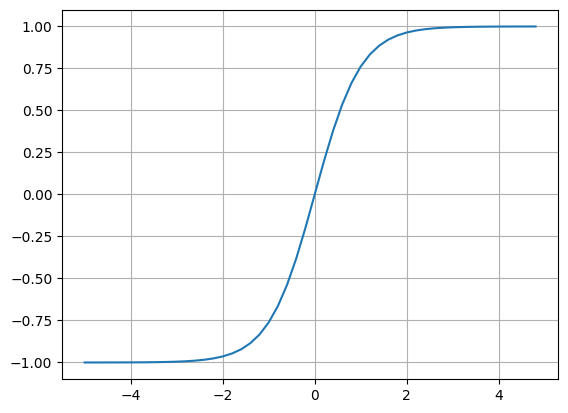

In [5]:
# Plot the tanh function as an example
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

## The neuron and its mathematical equivalent
Compare [the drawing of a neuron in our brains](https://cs231n.github.io/assets/nn1/neuron.png) with the [mathematical representation](https://cs231n.github.io/assets/nn1/neuron_model.jpeg).

In the following sections, we will write the code to simulate the neuron's working.

### The summation function

We will start with coding the Summation function ("Cell body") shown in the [mathematical representation](https://cs231n.github.io/assets/nn1/neuron_model.jpeg).

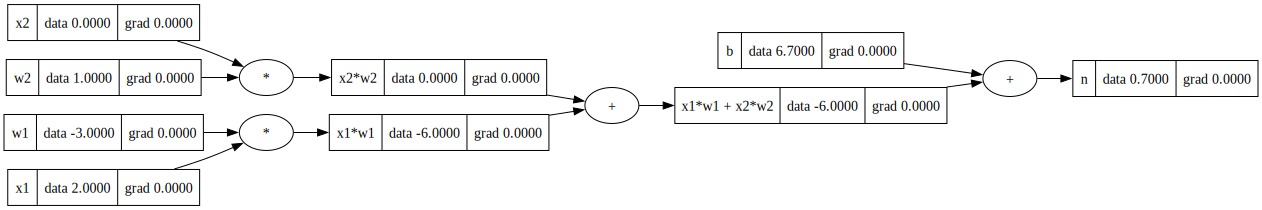

In [39]:
# inputs x1 and x2
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights w1 and w2
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')

# bias of the neuron
b = Value(6.7,label='b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

#graph out the expression
draw_dot(n)

### The output function
Now we use the tanh as the output function of the neuron shown in the [mathematical representation](https://cs231n.github.io/assets/nn1/neuron_model.jpeg).

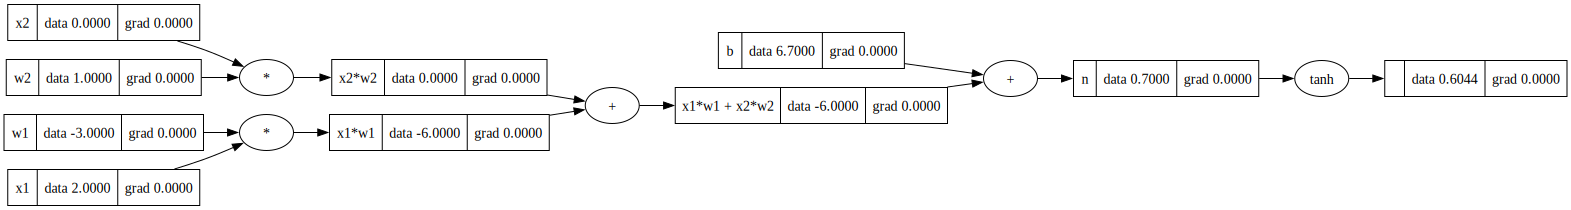

In [40]:
#graph out the output of the neuron
o = n.tanh()
draw_dot(o)

Let's use a special value for the bias.

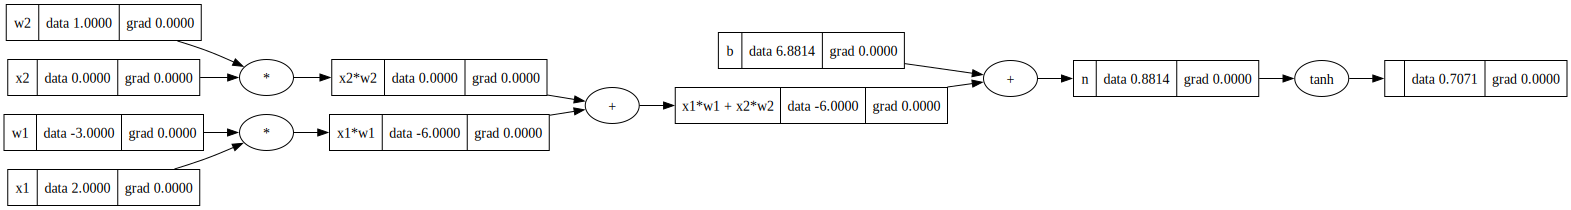

In [46]:
# inputs x1 and x2
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights w1 and w2
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')

# inputs x1 and x2
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights w1 and w2
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')

# bias of the neuron - special value to make numbers easier to work with
b = Value(6.8813735870,label='b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

#graph out the output of the neuron
o = n.tanh()
draw_dot(o)

## Manual back propagation
Let's proceed to manually assign gradients starting from right (output) to the left (inputs)

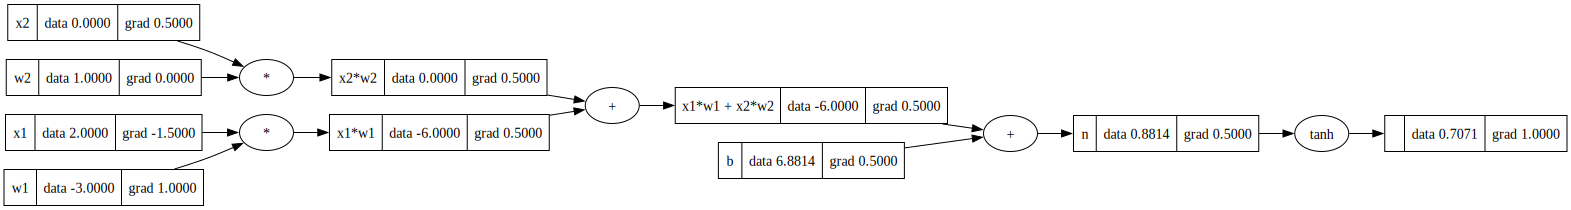

In [18]:
# Manually compute the gradients working backwards from L
o.grad = 1.0
n.grad = 0.5
x1w1x2w2.grad = 0.5

b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

# plo it
draw_dot(o)



## Automated back propagation
We saw how manual propagation can get tedious as the mathematical expressions get more complex. We now see how to enable automated back propagation.

### Enhance the Value function with _backward feature
Let's add the "backward" function to each operation to flow the computations back automatically.

In [3]:
class Value:
    """ stores a single scalar value and its gradient """
    
    def __init__(self, data,_children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        # internal variables used for autograd graph construction
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op # the op that produced this node, for graphviz / debugging / etc
        self.label=label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad = (1 - t**2) * out.grad
            
        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)

        build_topo(self)

        self.grad = 1.0 # start gradient with 1.0 (base case)
        # go one variable at a time and apply the chain rule to get its gradient
        for node in reversed(topo):
            node._backward()
        


### Re-initialize without any gradient values (gradient = 0)

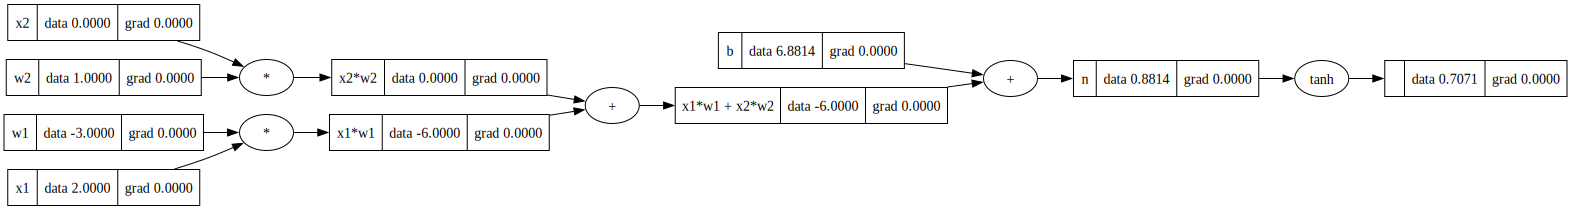

In [28]:
# inputs x1 and x2
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights w1 and w2
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')

# bias of the neuron - special value to make numbers easier to work with
b = Value(6.8813735870,label='b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

#graph out the output of the neuron
o = n.tanh()
draw_dot(o)

### Call the _backward function for "semi-automated" back propagation

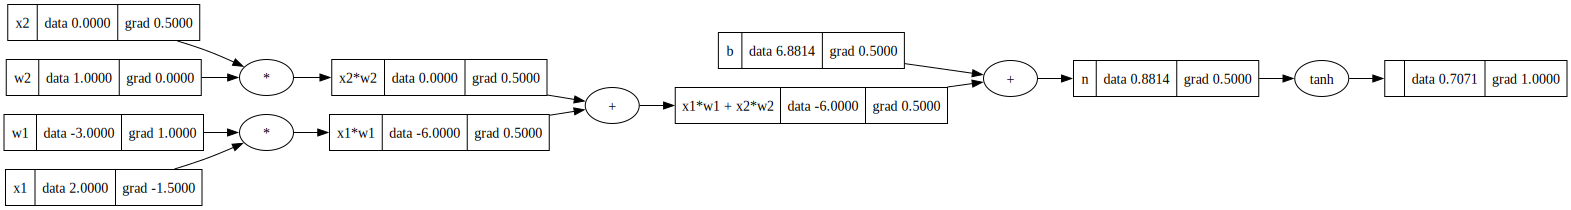

In [29]:
o.grad = 1.0 # start gradient with 1.0 (base case)
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

draw_dot(o)

### Topological sort - organize for full automation

Note the updated "VALUE" class with a new method called "backward()" at the class level.

In [ ]:
def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)

        build_topo(self)

        self.grad = 1.0 # start gradient with 1.0 (base case)
        # go one variable at a time and apply the chain rule to get its gradient
        for node in reversed(topo):
            node._backward()
        

Re-initialize our neuron with zero gradients

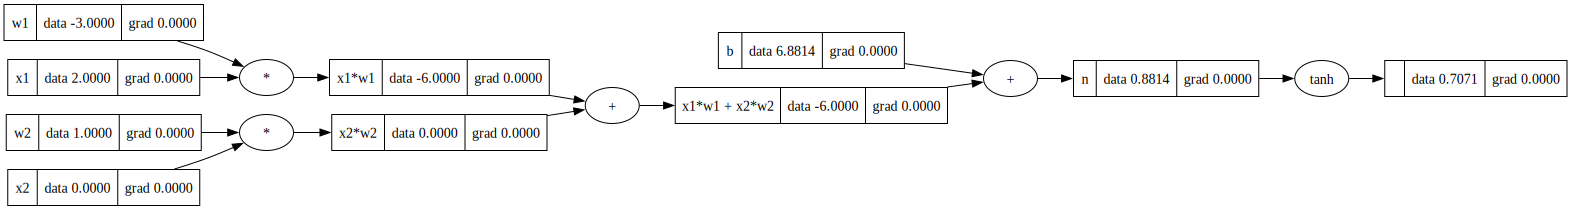

In [56]:
# inputs x1 and x2
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights w1 and w2
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')

# bias of the neuron - special value to make numbers easier to work with
b = Value(6.8813735870,label='b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

#graph out the output of the neuron
o = n.tanh()
draw_dot(o)

Call the "backward" method on the last "Output" node, 'o' to loop through the backward propagation.

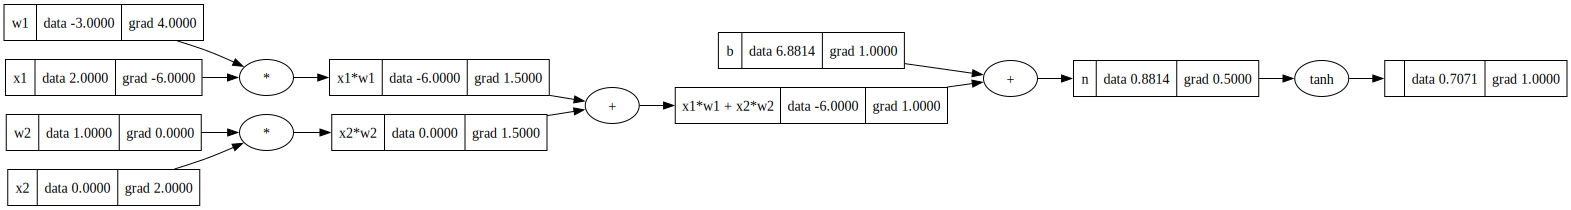

In [58]:
# Backpropagate gradients through the graph starting from o
o.backward()

# plot it
draw_dot(o)

# Test for back propagation fix

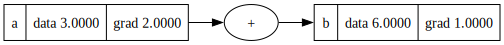

In [4]:
a = Value (3.0,label='a')

# In the graph, both 'a's point to 'b'
b = a + a
b.label = 'b'
b.backward()
draw_dot(b)

# Confirm that the gradients are correct
# (should be 2.0 for both a's) and it is.

# Thanks to this line of code in the __add__ method of the Value class:
# def _backward():
    # self.grad += out.grad
    # other.grad += out.grad